参考：https://www.lux-ai.org/specs-2021

# 1.背景
长夜漆黑，处处险恶。两支队伍必须战胜黑暗，收集资源，穿越时代前进。白天需要拼命地收集和积累资源，以度过即将到来的夜晚。仔细规划和扩展——任何不能产生足够光的城市都会被黑暗所吞噬。

# 2.环境
在《Lux AI Challenge Season 1》中，两支相互竞争的队伍控制着一支由Units和CityTiles组成的队伍，他们收集资源来为自己的城市提供燃料，主要目标是在回合制游戏的最后拥有尽可能多的CityTiles。两支队伍都拥有关于整个游戏状态的完整信息，并需要利用这些信息来优化资源收集，与对手竞争稀缺资源，并建造城市以获得分数。

每个参赛者必须用自己选择的语言编写自己的agent程序。每个回合，你的agent有3秒的时间来提交他们的行动，多余的时间不会被保存。在游戏中，当你超过一个回合规定的3秒限制时，你可以使用时间池内的60秒时间，当这60秒时间被用完并且你的动作超过3秒限制时，你的agent将被冻结，不再提交额外的动作。

# 3.地图
Lux的世界是用二维网格表示的。坐标方向增加东(右)和南(下)。地图总是正方形的，可以是12、16、24或32个格子。(0,0)坐标位于左上角。如下所示：

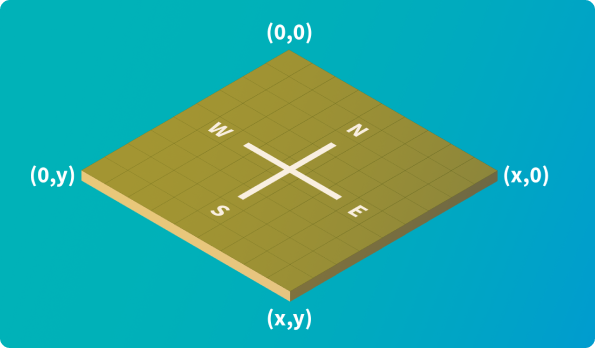

地图上面包含了 **Resources** (Wood木材，Coal煤炭，Uranium铀)，**Units**(Workers工人，Carts小推车)，**CityTiles**和**Road**。
为了防止地图偏袒某个玩家，地图总是通过垂直或水平保持对称。
每个玩家一开始都会有一个CityTile和一个Worker。


# 4.资源
总共包含3种资源:Wood木材、Coal煤炭和Uranium铀(按照燃料效率升序排列)。这些资源由Worker收集，当Worker移动到CityTile的上面时可以进行放置，然后转化为城市的燃料。有些资源需要研究点数(Rearch points)才能收集。

木材可以再生。在每个回合中，每个木块的木材数量将增加当前木材数量的2.5%。被耗尽的木块不会再生。只有少于500块木材的木块才能再生。

不同资源所需的研究点数、燃料价值、收集数量关系如下


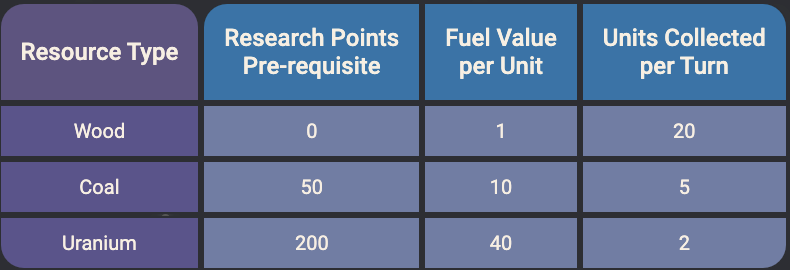

## 4.1收集机制
在每个回合结束时，Worker会自动从所有邻近(北、东、南、西或中心)的资源块中获得资源，他们根据以下规则收集资源:
- 先铀，煤，然后木材资源:
    - 每个单位发出资源收集请求，从当前需要迭代的资源的每个相邻块中收集偶数个资源，以便收集的数量使单位的货物达到容量。例如，一个工人身上带着60份木头，他旁边有3块木块，每一块要14份，将得到40份木头，然后浪费2份。
    - 首先会迭代当前所有的资源需求，然后尝试完成需求，如果不能满足需求，他们确保所有未完成的需求得到相同的数量，然后剩下的会被浪费掉。例如，如果4个工人挖一块有25份木头的木块，但其中一个工人只需要5块，而其他工人每个人需要20块木头，那么首先所有工人都得到5份木头，剩下5份木头给3个工人。这可以通过给最后3个工人每人1份木头来平均分配，留下2块木头，然后就被浪费掉。

worker不能在CityTiles上采集资源。但是，如果CityTile上至少有一个worker，那么CityTile将自动以与worker相同的速率收集相邻的资源，并直接将其转换为燃料。CityTile的收集机制与worker相同，你可以将CityTile视为收集资源的单个worker。

# 5.动作
Units 和 CityTiles 可以每回合在特定条件下执行操作。通常，所有动作都会同步执行，并在回合开始时根据游戏状态进行验证。接下来的几节详细描述了 Units 和 CityTiles。

## 5.1 CityTiles
CityTile是一个只占用一个空间的建筑。相邻的CityTile共同构成一个City。如果CityTile的冷却时间<1，那么它可以执行一个动作。

CityTile的动作包括
- 创建工人：在这个CityTile上建造worker单位(如果当前拥有的worker+小推车数量等于拥有的CityTile数量，则不能建造worker)
- 创建小推车：在这个CityTile上建造小推车单位(如果当前拥有的worker+小推车数量等于拥有的CityTile数量，则不能建造小推车)
- 研究：提升队伍1点研究点数（Research Point）

## 5.2 Units
这里有两种单位类型，Worker(工人)和Cart(小推车)。当每个单位的冷却时间<1时，他们可以执行单个动作。

所有单位可以选择移动动作，并向5个方向中的任何一个方向移动，北，东，南，西，中心。此外，所有单位都可以携带从自动开采或资源转移中获得的资源。worker资源上限为100，小推车资源上限为2000。

每当一个单位移动到一个本队的CityTile上时，CityTile所形成的City就会将所有携带的资源转化为燃料。

在没有CityTile的地块上最多只能有一个单位。此外，单位不能移动到对手的CityTile上。但是，单位可以堆叠在一个本队的CityTile上。

如果两个单位试图移动到非CityTile的相同地块上，这就会被认为是一种碰撞，移动动作就会被取消。

### 5.2.1 Workers
动作包括：
- 移动。 移动包括5个方向：北、东、南、西、中心。
- 掠夺。 将单位所在地块的道路等级（Road Level）降低0.5。
- 转移。 将任意数量的单一类型资源从一个单位转移到另一个相邻单位（在回合开始时），最多达到后者的货物容量上限，多余的部分返还给原单位。
- 建造CityTile。 在worker的当前位置建造CityTile，前提是该worker的货物中有100个任意类型的总资源（达到worker的资源上限），并且所处的地块是空的。如果建造成功，则消耗所有携带的资源，并以0起始资源构建新的CityTile。

### 5.2.2 Carts
动作包括：
- 移动。 移动包括5个方向：北、东、南、西、中心。
- 转移。 将任何数量的单一资源类型从一个单位的货物发送到另一个（在回合开始时）相邻单位，最多达到后者的货物容量上限，多余的部分返还给原单位。


# 6.冷却
CityTiles, Workers, Carts在每个动作后都有冷却机制。Units和CityTiles只有在冷却时间小于1时才能执行一个动作。

在每回合结束时，在道路被建造和掠夺后，每个单位的冷却时间减小1，然后根据回合结束时所处道路的等级进一步减少冷却时间（冷却时间 - Road Level）。CityTiles不受道路等级的影响，冷却时间总是减少1，最小冷却时间为0。

一个动作执行之后，单位的冷却时间会增加一个基础冷却时间，具体如下：


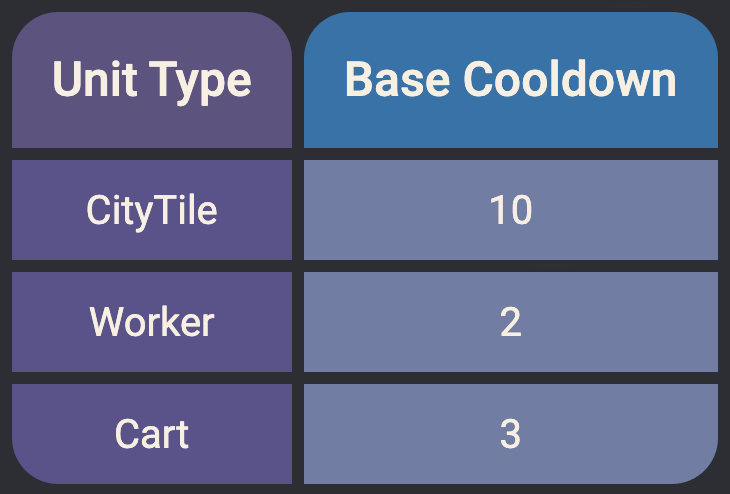

# 7.道路
当小推车在地图上行驶时，它们建造道路让所有的单位能够更快地移动（参考冷却机制）。在每回合结束，小推车会更新它所处地块的道路等级（+0.75）。道路等级越高，单位可以更快地移动和执行动作。所有地块的初始道路等级为0，上限为6。

此外，CityTiles的道路等级自动设置为6。

道路也可以被worker通过掠夺的动作减少道路等级，每次减0.5。

如果一个城市被黑暗吞噬，城市里面所有的CityTiles的道路等级会变成0。

# 8.昼夜更替
每个昼/夜更替由40个回合组成，前30个回合为白天，后10个回合为夜晚。一场比赛共有360个回合，形成9轮昼夜更替。

在夜间，Units和Cities需要制造光能来生存。每个夜晚回合，每个Unit和CityTile需要消耗一定量的燃料，如下表所示。特别地，Units利用它们自身携带的资源来制造光能，然而CityTiles使用自身存储的燃料来制作光能。

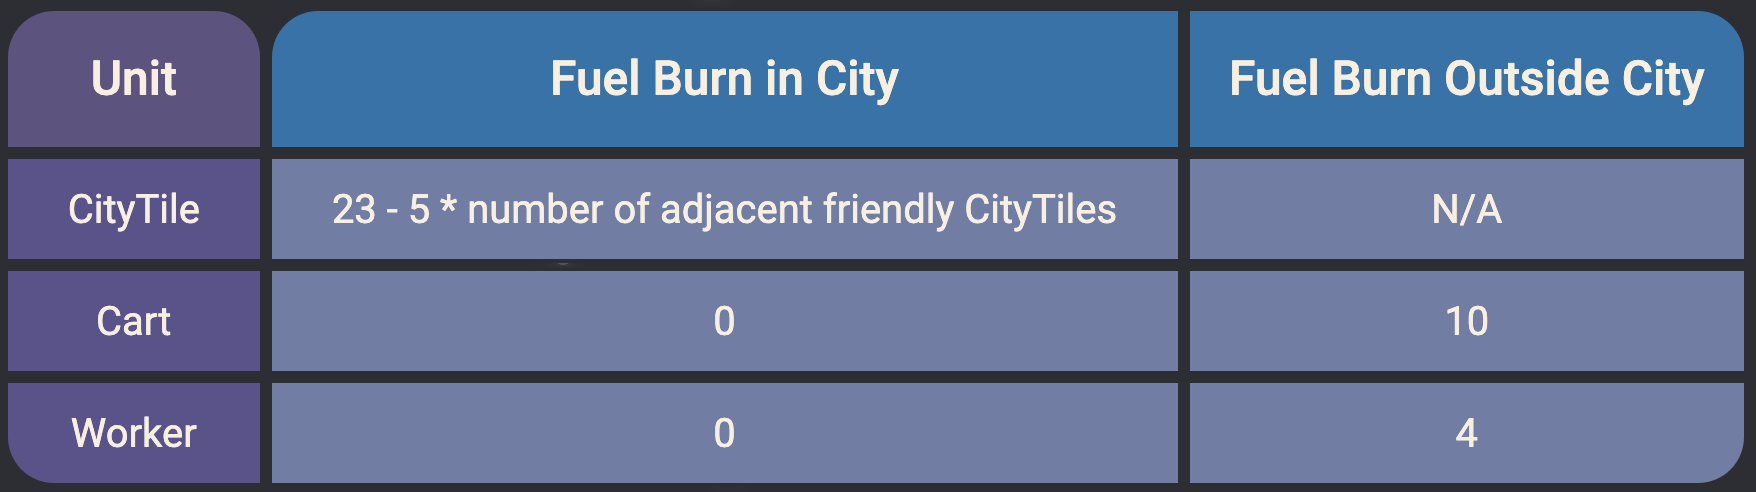

Workers和Carts只有不在CityTile上时才需要消耗资源。当在City外边时，worker和cart必须消耗整数单位的资源来满足他们的夜间需求，例如，如果一个worker携带 1 个木头和 5 个铀，他们将消耗 1 个燃料的完整木材，然后消耗一个完整单位的铀满足最后 3 个燃料需求，浪费 37 个燃料(40-3)。单位总是首先消耗效率最低的资源。

在夜间，单位的冷却时间x2。

如果任何单位在夜间耗尽燃料，它们将从游戏中被移除并永远消失在黑夜中。如果一个城市的燃料耗尽，则整个城市（包括其拥有的所有CityTiles）将陷入黑暗并从游戏中移除。

# 9.游戏细节
为了避免混淆每个回合内的小细节，此处提供游戏中动作的顺序。

游戏中的动作首先都针对当前游戏状态进行验证，以查看它们是否合法。然后按照以下顺序在每个步骤中同时处理动作和游戏事件。

1. CityTile执行动作，并增加冷却时间
2. Unit执行动作，并增加冷却时间
3. Road被创建
4. 资源收集
5. 资源放置于CityTile中
6. 如果在夜间，Units消耗资源，CityTiles消耗燃料
7. 未消耗至0的木材进行资源再生
8. 计算和处理每个Unit和CityTile的冷却时间

唯一例外是单位可以在空间之间平滑移动，这意味着如果两个单位相邻，它们可以在一回合内交换位置。

不允许一个单位建造 CityTile，然后另一个单位同时移动到新的 CityTile 上的动作，因为当前状态没有这个新建的城市，并且单位不能移动到 CityTiles 之外的其他单位之上。

## 10.获胜条件
在360回合后，在地图上拥有最多CityTiles的队伍获得胜利。如果CityTiles相同，则拥有更多Unit的队伍获胜。如果Unit数量还相同，那么标记为平局。

如果队伍已经不再拥有任何Unit或者CityTiles，游戏会提前结束，另一只队伍获胜。